# 0.) Import and Clean data

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [191]:
#drive.mount('/content/gdrive/', force_remount = True)

In [192]:
df = pd.read_csv("bank-additional-full (1).csv", delimiter = ";")

In [193]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [194]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [195]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,57,149,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,37,226,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,40,151,no,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,56,307,no,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [196]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

In [197]:
import numpy as np


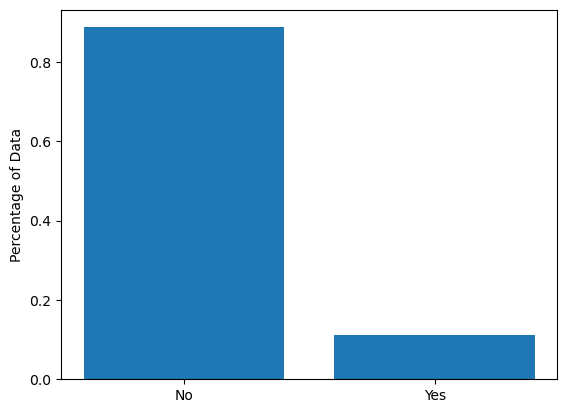

In [198]:
import matplotlib.pyplot as plt
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [199]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# 1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [200]:
###############
###TRANSFORM###
###############
#Lets transform the data becaue the label is not balanced
#Transform X_scaled and y_train in order to balance the label
#Use the SMOTE algorithm to balance the label
#Use the SMOTE algorithm to balance the label
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state=42)
#X_scaled, y_train = sm.fit_resample(X_scaled, y_train)

from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features= X.dtypes == "bool", random_state=42)

smote_X, smote_y = smote_nc.fit_resample(X_train, y_train)


scaler = StandardScaler().fit(smote_X)

X_scaled = scaler.transform(smote_X)
X_test = scaler.transform(X_test)

y_train = smote_y

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [201]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.491\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.775\ngini = 0.332\nsamples = 20078\nvalue = [15865, 4213]\nclass = No'),
 Text(0.125, 0.375, 'duration <= -0.823\ngini = 0.085\nsamples = 7841\nvalue = [7492, 349]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.032\nsamples = 5851\nvalue = [5757, 94]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.223\nsamples = 1990\nvalue = [1735, 255]\nclass = No'),
 Text(0.375, 0.375, 'contact_telephone <= 0.597\ngini = 0.432\nsamples = 12237\nvalue = [8373, 3864]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.485\nsamples = 8939\nvalue = [5235, 3704]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.092\nsamples = 3298\nvalue = [3138, 160]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 0.597\ngini = 0.43\nsamples = 31082\nvalue = [9715, 21367]\nclass = Yes'),
 Text(0.625, 0.375, 'duration <= 0.396\ngini = 0.357\nsamples = 24836\nvalue = [5785, 19051]\nclass 

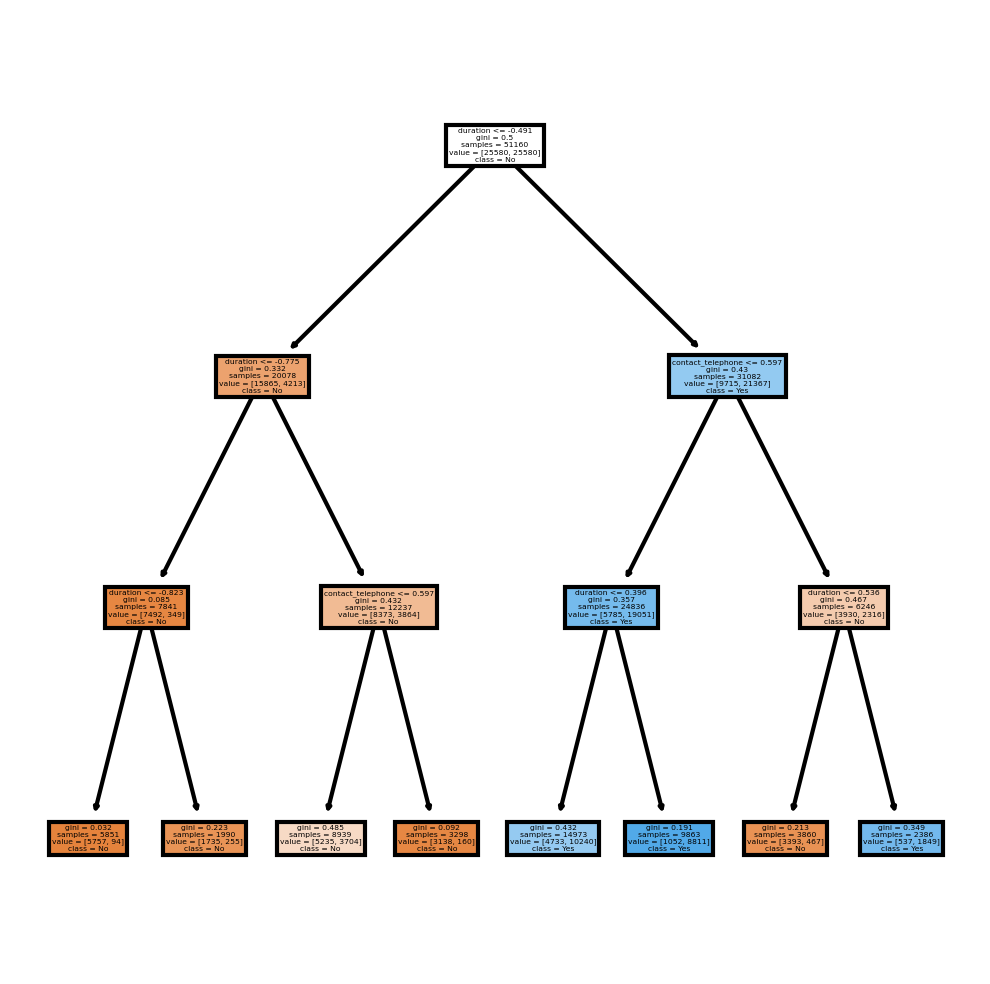

In [202]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree, filled = True, feature_names = X.columns, class_names=["No","Yes"])


#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [203]:
y_pred = dtree.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

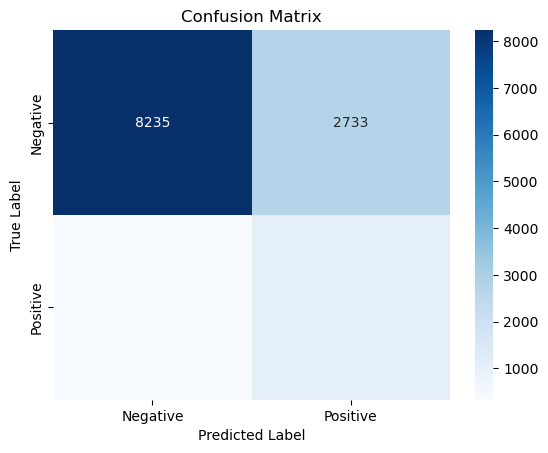

In [204]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
#Positive, is they got in contact with somebody. Negative, is they did not get in contact with somebody

# 3.) Use bagging on your descision tree

In [205]:
#Opimize on Max depth...
dtree = DecisionTreeClassifier(max_depth = 3 )

In [206]:
bagging = BaggingClassifier(base_estimator=dtree, n_estimators=100, random_state=42, max_samples=0.5, max_features=10)

In [207]:
bagging.fit(X_scaled, y_train)
y_pred = bagging.predict(X_test)


/Users/luisj/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luisj/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [208]:

y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

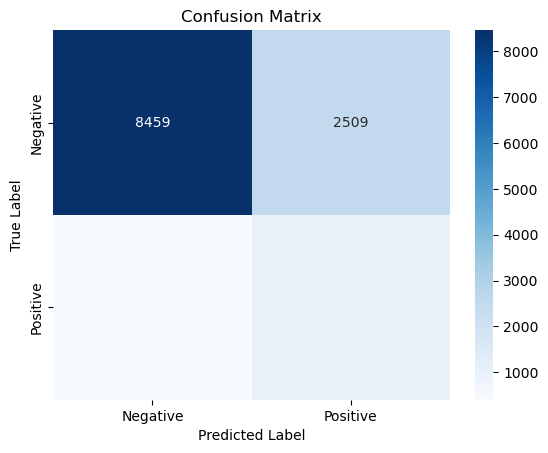

In [209]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [210]:
from sklearn.ensemble import AdaBoostClassifier

In [211]:

boost = AdaBoostClassifier(base_estimator=dtree, n_estimators=50, random_state=42, learning_rate=0.01)

In [212]:
boost.fit(X_scaled, y_train)
y_pred = boost.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)


/Users/luisj/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luisj/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


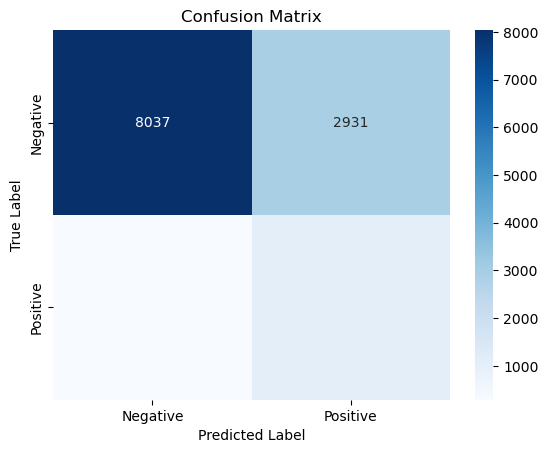

In [213]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 4 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [214]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
#Superlearn from mlens

# 5.) Train a Logistic Regression on the decision Tree, Boosted Tree and Bagged Tree.

# Interpret coefficients and significance. 

In [215]:
dtree_main = DecisionTreeClassifier(max_depth = 3)
dtree_main.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

In [216]:
X_baselearner = [list(bagging.predict(X_test)),
list(boost.predict(X_test)),
list(dtree_main.predict(X_test))]
#Lets put names to the base learners
X_baselearner = pd.DataFrame(X_baselearner).T
X_baselearner.columns = ["Bagging", "Boosting", "Dtree"]

In [217]:
super_learner = LogisticRegression()

In [218]:

super_learner.fit(X_baselearner, y_test)


/Users/luisj/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [219]:
super_learner.coef_

array([[1.28168351, 1.04485211, 0.6865138 ]])

In [220]:
#Wich model was the best?
#Lets compare the accuracy of the models
#Accuracy of the models
accuracy = [accuracy_score(y_test, bagging.predict(X_test)),
accuracy_score(y_test, boost.predict(X_test)),
accuracy_score(y_test, dtree_main.predict(X_test)),
accuracy_score(y_test, super_learner.predict(X_baselearner))]
accuracy = pd.DataFrame(accuracy, index = ["Bagging", "Boosting", "Dtree", "Super Learner"], columns = ["Accuracy"])
accuracy

,Accuracy
Bagging,0.764344
Boosting,0.739176
Dtree,0.752286
Super Learner,0.887594


In [221]:
#What about f1 score?
from sklearn.metrics import f1_score
f1 = [f1_score(y_test, bagging.predict(X_test)),
f1_score(y_test, boost.predict(X_test)),
f1_score(y_test, dtree_main.predict(X_test)),
f1_score(y_test, super_learner.predict(X_baselearner))]
f1 = pd.DataFrame(f1, index = ["Bagging", "Boosting", "Dtree", "Super Learner"], columns = ["F1 Score"])
f1

,F1 Score
Bagging,0.403767
Boosting,0.405021
Dtree,0.409415
Super Learner,0.000000


# 6.)